# Preparation 1

Here, I test how to prepare the data set for the first few runs.
First, I want to keep the color and downsize as much as there are brown spots still clearly visible.

First, we get a small sample.

In [39]:
# Python libraries
import os
import random

# External modules
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Constants
SEED = 69

# Settings
random.seed(SEED)


raw_data_path = os.path.join('..', 'data', 'raw-data')
img_names = os.listdir(os.path.join(raw_data_path, 'images'))

img_sample = []
for _ in range(10):
    rand_name = random.choice(img_names)
    rand_img = cv2.imread(os.path.join(raw_data_path, 'images', rand_name))
    img_sample.append(rand_img)

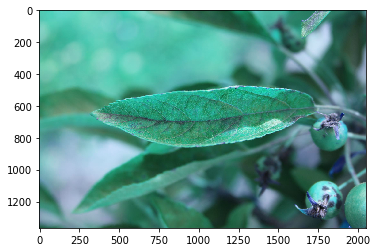

In [40]:
example_healthy = img_sample[0]
plt.imshow(example_healthy)

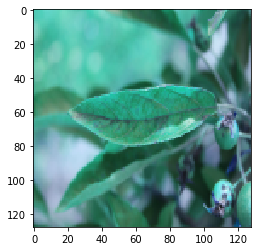

In [41]:
plt.imshow(cv2.resize(example_healthy, (128, 128), interpolation = cv2.INTER_AREA))

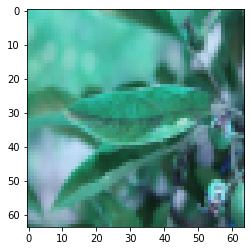

In [42]:
plt.imshow(cv2.resize(example_healthy, (64, 64), interpolation = cv2.INTER_AREA))

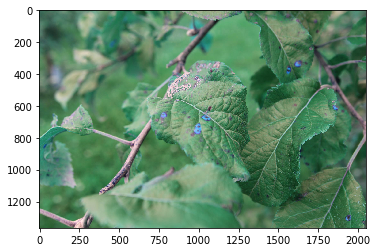

In [43]:
example_sick = img_sample[4]
plt.imshow(example_sick)

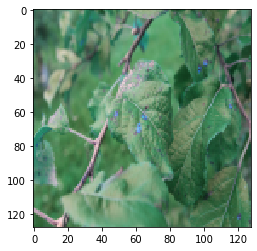

In [44]:
plt.imshow(cv2.resize(example_sick, (128, 128), interpolation = cv2.INTER_AREA))

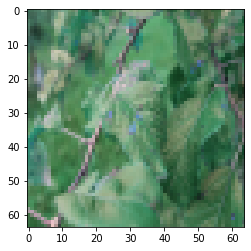

In [45]:
plt.imshow(cv2.resize(example_sick, (64, 64), interpolation = cv2.INTER_AREA))

The dimensions (128, 128) seem to keep the important parts best. Also, the colors will be kept since the diseases can be spotted by looking for blue or brown colorations. Now we need to convert it into a flattened array and then convert it back.

## Test flattening

In [46]:
example_sick = cv2.resize(example_sick, (128, 128), interpolation = cv2.INTER_AREA)
print(example_sick.shape)
three_dim_img = np.asarray(example_sick) / 255.0
display(three_dim_img)

(128, 128, 3)


array([[[0.23921569, 0.41568627, 0.35294118],
        [0.25098039, 0.43137255, 0.35686275],
        [0.25490196, 0.43921569, 0.35294118],
        ...,
        [0.33333333, 0.53333333, 0.43921569],
        [0.31764706, 0.48627451, 0.40784314],
        [0.29803922, 0.44313725, 0.37647059]],

       [[0.23529412, 0.40784314, 0.34509804],
        [0.23529412, 0.41568627, 0.34117647],
        [0.25882353, 0.42745098, 0.34117647],
        ...,
        [0.32156863, 0.5254902 , 0.42745098],
        [0.30980392, 0.4745098 , 0.39215686],
        [0.29019608, 0.41960784, 0.35294118]],

       [[0.22352941, 0.39607843, 0.33333333],
        [0.23137255, 0.39215686, 0.32156863],
        [0.25882353, 0.41176471, 0.32941176],
        ...,
        [0.3254902 , 0.50980392, 0.41960784],
        [0.31372549, 0.45882353, 0.37647059],
        [0.28235294, 0.39607843, 0.33333333]],

       ...,

       [[0.23529412, 0.43921569, 0.28235294],
        [0.22745098, 0.43137255, 0.27058824],
        [0.2       , 0

[0.23921569 0.41568627 0.35294118 ... 0.3372549  0.44705882 0.39215686]


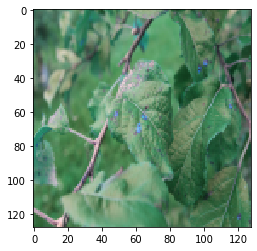

In [47]:
flattened_img = three_dim_img.reshape((128 * 128 * 3, ))
print(flattened_img)
reshaped_img = flattened_img.reshape((128, 128, 3))
plt.imshow(reshaped_img)

Works! So now we know how to store the image and how to reshape it back in way that is useful later on. 
Now we create the actual data set.

## Data set creation

In [48]:
# Python libraries
import csv

# External modules
from tqdm import tqdm

# Typing
from typing import List


def create_frame(names: List[str]) -> pd.DataFrame:
    imgs = []
    for name in tqdm(names):
        path = os.path.join(raw_data_path, 'images', name)
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
        img = np.asarray(img) / 255.0
        img = img.reshape((128 * 128 * 3, ))
        imgs.append(img)
    
    imgs = np.array(imgs)
    imgs = np.round(imgs, decimals = 6)
    imgs = pd.DataFrame(imgs)
    imgs.index = pd.Series(names)
    
    return imgs 

train_img_names = [ name for name in img_names if 'Train' in name ][:10]
test_img_names = [ name for name in img_names if 'Test' in name ][:10]

train_frame = create_frame(train_img_names)
train_path = os.path.join('..', 'data', 'generated-data', 'train-128.csv')
train_frame.to_csv(
    train_path,
    index = True,
    quoting = csv.QUOTE_MINIMAL
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.50it/s]


## Correctness check
It it really the same picture, and are they correctly displayed?


0         1         2         3         4         5  \
Train_10.jpg    0.419608  0.733333  0.631373  0.450980  0.713725  0.572549   
Train_1004.jpg  0.066667  0.145098  0.109804  0.047059  0.149020  0.098039   
Train_1001.jpg  0.419608  0.588235  0.533333  0.498039  0.654902  0.611765   
Train_100.jpg   0.403922  0.576471  0.431373  0.376471  0.564706  0.403922   
Train_0.jpg     0.054902  0.203922  0.133333  0.058824  0.219608  0.137255   

                       6         7         8         9  ...     49142  \
Train_10.jpg    0.360784  0.686275  0.529412  0.333333  ...  0.858824   
Train_1004.jpg  0.054902  0.172549  0.121569  0.074510  ...  0.317647   
Train_1001.jpg  0.545098  0.690196  0.658824  0.549020  ...  0.450980   
Train_100.jpg   0.372549  0.556863  0.392157  0.325490  ...  0.341176   
Train_0.jpg     0.062745  0.227451  0.156863  0.078431  ...  0.803922   

                   49143     49144     49145     49146     49147     49148  \
Train_10.jpg    0.352941  0.878431  0.854902  0.364706  0.874510  0.858824   
Train_1004.jpg  0.196078  0.407843  0.298039  0.270588  0.466667  0.372549   
Train_1001.jpg  0.501961  0.611765  0.564706  0.533333  0.643137  0.592157   
Train_100.jpg   0.321569  0.552941  0.372549  0.384314  0.580392  0.415686   
Train_0.jpg     0.631373  0.831373  0.796078  0.690196  0.835294  0.784314   

                   49149     49150     49151  
Train_10.jpg    0.349020  0.866667  0.858824  
Train_1004.jpg  0.345098  0.521569  0.454902  
Train_1001.jpg  0.458824  0.603922  0.537255  
Train_100.jpg   0.431373  0.600000  0.443137  
Train_0.jpg     0.596078  0.807843  0.749020  

[5 rows x 49152 columns]

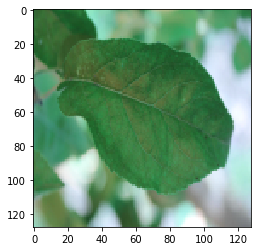

In [49]:
train_frame_reload = pd.read_csv(train_path, quoting = csv.QUOTE_MINIMAL, index_col = 0)
display(train_frame_reload.sample(5))

test_img = train_frame_reload.iloc[train_frame_reload.index == 'Train_1005.jpg']
test_img = test_img.values[0]
test_img = test_img.reshape((128, 128, 3))
plt.imshow(test_img)

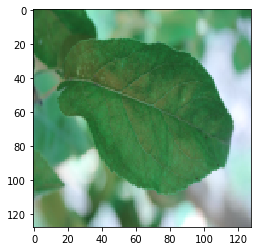

In [50]:
train_y = pd.read_csv(os.path.join(raw_data_path, 'train.csv'))
train_y[train_y.image_id == 'Train_1005']

compare_img = cv2.imread(os.path.join(raw_data_path, 'images', 'Train_1005.jpg'))
compare_img = cv2.resize(compare_img, (128, 128), interpolation = cv2.INTER_AREA)
plt.imshow(compare_img)

Definetly a healthy leave, and both show the same picture. Data successfully prepared. Now we do it for the whole data set.

In [51]:
train_img_names = [ name for name in img_names if 'Train' in name ]
test_img_names = [ name for name in img_names if 'Test' in name ]

train_path = os.path.join('..', 'data', 'generated-data', 'train-128.csv')
test_path = os.path.join('..', 'data', 'generated-data', 'test-128.csv')

train_frame = create_frame(train_img_names)
train_frame.to_csv(
    train_path,
    index = True,
    quoting = csv.QUOTE_MINIMAL
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1821/1821 [01:03<00:00, 28.67it/s]


In [52]:
test_frame = create_frame(test_img_names)
test_frame.to_csv(
    test_path,
    index = True,
    quoting = csv.QUOTE_MINIMAL
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1821/1821 [01:10<00:00, 25.65it/s]
